In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

#### Now we will be loading and reading the provided dataset for the problem:

In [3]:
data = pd.read_excel(r"C:\Users\Dell\Downloads\Data_Train.xlsx")
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


**Extracting basic information about our dataset:**
   * Columns
   * Total Entries
   * Data types of columns
   * Describe of the integer columns
   * Missing values

In [4]:
data.shape

(6019, 12)

In [5]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [6]:
print(data.isna().any())
print("\n")
print(data.info())
print("\n")
data.describe()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
Price                False
dtype: bool


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              598

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


**Columns with missing values are ['Mileage', 'Engine', 'Power', 'Seats']**

Also these columns are in categorical form we'll be converting them to numerical variables for EDA.

**From this we also see that the minimum value of seats is 0 which isn't physically feasbile so its an error in the data.**

In [7]:
#Converting columns to numeric value
data['Mileage'] = data['Mileage'].str.split().str.get(0)
data['Mileage'] = data['Mileage'].apply(pd.to_numeric)

#Filling null and NAN values in Power column

data['Power'] = data['Power'].str.split().str.get(0)
data['Power'] = data['Power'].replace('null', np.nan)
data['Power'] = data['Power'].replace('nan', np.nan)
data['Power'] = data['Power'].apply(pd.to_numeric)


data['Engine'] = data['Engine'].str.split().str.get(0)
data['Engine'] = data['Engine'].replace('nan',np.nan)
data['Engine'] = data['Engine'].apply(pd.to_numeric)

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


**We see that minimum values of Mileage and Seats are zero which is not possible for a car,most likely missing values were replaced by 0 in those columns.**


In [8]:
data.replace(0,np.nan,inplace=True)
print(data[data.Mileage == 0])
data[data.Seats == 0]

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [9]:
data.reset_index(drop=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [10]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,5949.000000,5983.000000,5876.000000,5976.000000,6019.000000
mean,2013.358199,5.873838e+04,18.342252,1621.276450,113.253050,5.279618,9.479468
std,3.269742,9.126884e+04,4.175475,601.355233,53.874957,0.806019,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [11]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 43
Price                  0
dtype: int64

**Checking if there is any duplicate data that can be dropped:**

In [12]:
data.duplicated().sum()

0

### Cleaning Data:

**Removing missing values (NANs)**

In [13]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 43
Price                  0
dtype: int64

In [14]:
data[data.Fuel_Type == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


*We can see that For Electric car the mileage column holds a NaN value which makes sense,we can replace those with 0 or some other distinguishing value*

In [15]:
data.loc[data.Fuel_Type =='Electric'] = data.loc[data.Fuel_Type =='Electric'].replace(np.nan,0) 
data[data.Fuel_Type == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,0.0,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,0.0,1798.0,73.0,5.0,12.75


**We will split the name into brand,model,version**

In [16]:
# print(str(data.Name).split())
#data['Brand'] = data.Name.str.split().str.get(0)
data['Brand']=pd.DataFrame(data['Name'].apply(lambda x: x.split(' ',2)))
data[['Brand','Model','Version']] = pd.DataFrame(data.Brand.tolist(),index=data.index)
data = data[['Brand','Model','Version']+data.columns[:-3].tolist()]
data.head()
# data['Brand'].value_counts()

,Brand,Model,Version,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,R LXI CNG,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta,1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz,V,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga,VDI,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4,New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [17]:
# Excpet for the brand Land Rover rest of the name splits are accurate
data[data.Brand == 'Land'].head(2)

,Brand,Model,Version,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
13,Land,Rover,Range Rover 2.2L Pure,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,27.0
14,Land,Rover,Freelander 2 TD4 SE,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115.0,5.0,17.5


In [18]:
#Fixing the Land Rover Brand name
def Corrector(x):
    x.Brand = 'Land Rover'
    if 'Range Rover' not in x.Version:
        x.Model,x.Version = x.Version.split(" ",1)
    else:
        x.Model = 'Range Rover'
        x.Version = x.Version.split('Range Rover',1)[1]
    return x

data.loc[data.Brand == 'Land'] = data.loc[data.Brand == 'Land'].apply(lambda row: Corrector(row),axis =1).copy()

In [19]:
data[data.Brand == 'Land Rover'].head(2)

,Brand,Model,Version,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
13,Land Rover,Range Rover,2.2L Pure,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,27.0
14,Land Rover,Freelander,2 TD4 SE,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115.0,5.0,17.5


**Checking Null Values**

In [20]:
data.isnull().sum()

Brand                  0
Model                  0
Version                0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               68
Engine                36
Power                143
Seats                 43
Price                  0
dtype: int64

### Filling NaN values

Filling NaN in the columns by looking for missing values of same brand and model of the car in a different year.

In [21]:

for i in ['Power','Engine','Seats','Mileage']:

    a = data.groupby(['Brand','Model','Year'])[i].agg('mean')
    a = pd.DataFrame(a)

    a.reset_index(col_level=i,inplace=True)
    
    a.replace(0.0,np.nan,inplace = True)
    a.fillna(method='ffill',inplace=True)

    a.drop(columns ='Year',inplace=True)

    a = a.set_index(['Brand','Model'])

    a=a.to_dict()
    
    if(i=='Power'):
        p = a
    elif(i=='Mileage'):
        m = a
    elif(i=='Engine'):
        e = a 
    else:
        s =  a

def fill_Power(x):
    if (x.Brand,x.Model) in p['Power'].keys():
        x.Power = p['Power'][(x.Brand,x.Model)]
    return x
def fill_mileage(x):
    if (x.Brand,x.Model) in m['Mileage'].keys():
        x.Mileage = m['Mileage'][(x.Brand,x.Model)]
    return x
def fill_seats(x):
    if (x.Brand,x.Model) in s['Seats'].keys():
        x.Seats = s['Seats'][(x.Brand,x.Model)]
    return x
def fill_Engine(x):
    if (x.Brand,x.Model) in e['Engine'].keys():
        x.Engine = e['Engine'][(x.Brand,x.Model)]
    return x

In [22]:
data.loc[data.Mileage.isnull()] = data.loc[data.Mileage.isnull()].apply(lambda x: fill_mileage(x),axis=1,result_type='expand')

data.loc[data.Power.isnull()] = data.loc[data.Power.isnull()].apply(lambda x: fill_Power(x),axis=1,result_type='expand')

data.loc[data.Seats.isnull()] = data.loc[data.Seats.isnull()].apply(lambda x: fill_seats(x),axis=1,result_type='expand')

data.loc[data.Engine.isnull()] = data.loc[data.Engine.isnull()].apply(lambda x: fill_Engine(x),axis=1,result_type='expand')

In [23]:
data.isnull().sum()

Brand                0
Model                0
Version              0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### Filter bad data:

In [24]:
# Filter bad data
dataClean = data[
    (data["Year"].between(2004, 2019, inclusive=True)) &
    (data["Power"].between(100, 600, inclusive=True)) &
    (data["Price"].between(3, 120, inclusive=True)) &
    (data["Kilometers_Driven"].between(100, 350000, inclusive=True))]

In [25]:
dataClean.reset_index(drop=True)

,Brand,Model,Version,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai,Creta,1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,Audi,A4,New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
2,Toyota,Innova,Crysta 2.8 GX AT 8S,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
3,Volkswagen,Vento,Diesel Comfortline,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
4,Maruti,Ciaz,Zeta,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,Mercedes-Benz,M-Class,ML 320 CDI,Mercedes-Benz M-Class ML 320 CDI,Mumbai,2009,102002,Diesel,Automatic,First,8.70,2987.0,224.34,5.0,10.75
2634,Porsche,Panamera,Diesel,Porsche Panamera Diesel,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85,2967.0,300.00,4.0,45.00
2635,Toyota,Camry,Hybrid,Toyota Camry Hybrid,Mumbai,2015,33500,Petrol,Automatic,First,19.16,2494.0,158.20,5.0,19.75
2636,Skoda,Superb,3.6 V6 FSI,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,14.67,3597.0,262.60,5.0,4.75


In [26]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.301608,1620.534973,112.725654,5.277953,9.479468
std,3.269742,9.126884e+04,4.180116,601.114545,53.968716,0.803778,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.290000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,93.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [27]:
data.head()

,Brand,Model,Version,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,R LXI CNG,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta,1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz,V,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga,VDI,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4,New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [28]:
data.shape

(6019, 15)

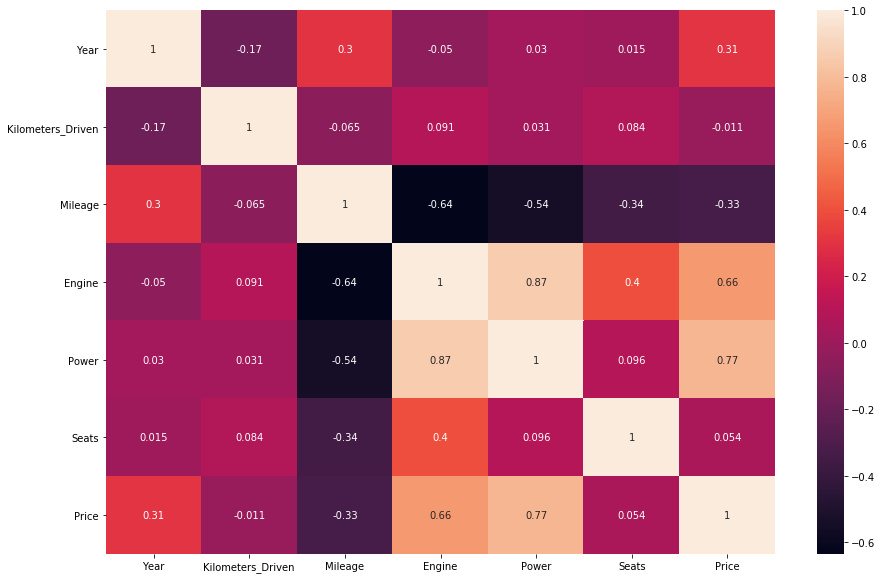

In [29]:
corr=data.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#data['Kilometers_Driven'] = scaling.fit_transform(data[['Kilometers_Driven']])
X_scaled = scaler.fit_transform(data[['Kilometers_Driven']])

In [31]:
X = data.loc[:, data.columns!='Price']
y = data['Price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.33,random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [34]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4213
1806
4213
1806


In [36]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [37]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [38]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)

In [44]:
'''scores_lo = []
scores_l = []
scores_svm = []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = data.data[train_index], data.data[test_index], data.target[train_index], data.target[test_index]
    scores_lo.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test))
    scores_l.append(get_score(LinearRegression(),X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(),X_train, X_test, y_train, y_test))'''

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
'''print(scores_lo)
print(scores_l)
print(scores_svm)'''

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [45]:
from sklearn.model_selection import cross_val_score

In [50]:
cross_val_score(LogisticRegression(), X, y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'First'

  FitFailedWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'First'

  FitFailedWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'First'

  FitFailedWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed

array([nan, nan, nan, nan, nan])

In [ ]:
cross_val_score(LinearRegression(), X, y)

In [ ]:
cross_val_score(SVC(), X, y)